# Classifying hear disease using machine learning
This Project looks into using various python-based machine learning and data science libraries in an attempt to build a
machine learning model capable of predicting whether or not someone has heart disease based on thier medical attributes.


We're going to take the following approch:
1. Problem defination
2. Data
3. Evaluation
4. Feature
5. Modeling
6. Experimentation

## 1. Problem Defination
In a statment,
> Given clinical parameters about patient, can we predict whether or not they have heart disease ?

## 2. Data
The Orignal data came from the cleavland data from the UCI Machine learning Repository. https://archive.ics.uci.edu/dataset/45/heart+disease
There is also a version of it available on kaggle. https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data/data

## 3. Evaluation
> If we can reach 85% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue th project.

# 4. Features
Information about  each feature in the data

**Creeate data dictionary**
1. id (Unique id for each patient)
2. age (Age of the patient in years)
3. origin (place of study)
4. sex (Male/Female)
5. cp chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])
6. trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
7. chol (serum cholesterol in mg/dl)
8. fbs (if fasting blood sugar > 120 mg/dl)
9. restecg (resting electrocardiographic results)
-- Values: [normal, stt abnormality, lv hypertrophy]
10. thalach: maximum heart rate achieved
11. exang: exercise-induced angina (True/ False)
12. oldpeak: ST depression induced by exercise relative to rest
13. slope: the slope of the peak exercise ST segment
14. ca: number of major vessels (0-3) colored by fluoroscopy
15. thal: [normal; fixed defect; reversible defect]
16. num: target [0=no heart disease; 1,2,3,4 = stages of heart disease ]

## Preparing the tools
We're going to use pandas, Matplotlib and Numpy for data and manipulation

In [1]:
# Importing Regular EDA(exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Importing models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score,f1_score
from sklearn.metrics import RocCurveDisplay

# ignoring unecessery warnings
import warnings
warnings.filterwarnings("ignore")

## Load data

In [2]:
df = pd.read_csv("heart_disease_uci.csv")
df.shape # (rows, columns)

(920, 16)

## Data exploration

In [3]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [4]:
df.tail()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0
919,920,62,Male,VA Long Beach,atypical angina,120.0,254.0,False,lv hypertrophy,93.0,True,0.0,NaN,NaN,NaN,1


In [5]:
df.columns

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [7]:
# statistical summary of the dataset
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


**Observation**
* The dataset consists of 920 entries, indicating there are 920 patient's records.
* There are 16 columns in total.
* These columns are a mix of numerical (int64 and float64) and categorical (object) data types.
* There are missing values in the dataset, as indicated by the non-null values in each column which we will deal later after exploring different columns just to get a better understanding of the dataset.

In [8]:
# exploring different columns
# exploring num (target value)
num = df["num"].value_counts()
num

num
0    411
1    265
2    109
3    107
4     28
Name: count, dtype: int64

**Observations:**
The target variable in this dataset is num, which represents the diagnosis of heart disease. The values in this variable and their counts are as follows:

* 0: 411 instances - Likely representing no presence of heart disease.
* 1: 265 instances - Indicating a certain level or type of heart disease.
* 2: 109 instances - Representing a different level or type of heart disease.
* 3: 107 instances - Another level or type of heart disease.
* 4: 28 instances - Yet another level or type of heart disease.

It appears that num is not just a binary indicator (presence or absence of heart disease) but rather seems to categorize the disease into different levels or types, with '0' possibly indicating the absence of disease.

In [9]:
# Age
max_age= df['age'].max()
min_age= df['age'].min()
print("Observation: ")
print(f"Max age: {max_age}")
print(f'Min age: {min_age}')

Observation: 
Max age: 77
Min age: 28


In [10]:
# exploring sex column
df["sex"].value_counts()

sex
Male      726
Female    194
Name: count, dtype: int64

In [11]:
# CP (chest pain) 
df['cp'].value_counts()

cp
asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: count, dtype: int64

* **Asymptomatic:** This indicates the absence of chest pain or discomfort, even in the presence of heart disease. Some individuals with heart disease do not experience the typical chest pain symptoms.

* **Non-Anginal Pain:** This refers to chest pain that is not related to heart disease. It might be caused by other factors such as muscular issues, gastrointestinal problems, or other non-cardiac conditions.

* **Atypical Angina:** This type of chest pain is similar to typical angina but differs in its characteristics, such as duration, intensity, or triggers. It may not always follow the classic pattern of typical angina.

* **Typical Angina:** The most common type of chest pain associated with heart disease, typically triggered by physical activity or stress and relieved by rest or medication like nitroglycerin. It's often described as a feeling of pressure or squeezing in the chest.

In [12]:
# Trestbps (resting blood pressure)
max_trestbps = df['trestbps'].max()
min_trestbps= df['trestbps'].min()
print("Observation: ")
print(f"Max trestbps of the patient: {max_trestbps}")
print(f'Min trestbps of the patient: {min_trestbps}')

Observation: 
Max trestbps of the patient: 200.0
Min trestbps of the patient: 0.0


In [13]:
# Chol (serum cholesterol)
max_chol = df['chol'].max()
min_chol= df['chol'].min()
print("Observation: ")
print(f"Max Cholestrol of the patient: {max_chol}")
print(f'Min Cholestrol of the patient: {min_chol}')

Observation: 
Max Cholestrol of the patient: 603.0
Min Cholestrol of the patient: 0.0


In [14]:
# Fbs (fasting blood sugar)
df['fbs'].value_counts()

fbs
False    692
True     138
Name: count, dtype: int64

* The fbs column, representing fasting blood sugar, is clinically important because a level above 120 mg/dL is often indicative of diabetes, which is a significant risk factor for heart disease. Elevated fasting blood sugar can damage blood vessels and increase the risk of cardiovascular conditions. In the context of heart disease prediction, this variable helps assess the impact of blood sugar levels on heart health.

* 0: Fasting blood sugar is below 120 mg/dL.
* 1: Fasting blood sugar is above 120 mg/dL.

In [15]:
# Restecg (resting electrocardiographic results)
df['restecg'].value_counts()

restecg
normal              551
lv hypertrophy      188
st-t abnormality    179
Name: count, dtype: int64

The restecg column usually includes a few distinct categories, each representing different electrocardiographic results. These typically include:

* Normal: Indicating no significant abnormalities in the ECG.
* ST-T Wave Abnormality: Suggesting potential issues with the heart's electrical activity.
* Left Ventricular Hypertrophy: Indicating enlargement of the heart's left ventricle.

In [16]:
# Thalach (maximum heart rate achieved)
max_thalch = df['thalch'].max()
min_thalch= df['thalch'].min()
print("Observation: ")
print(f"Max heart rate of the patient: {max_thalch}")
print(f'Min heart rate of the patient: {min_thalch}')

Observation: 
Max heart rate of the patient: 202.0
Min heart rate of the patient: 60.0


**Observations:**
* Max Heart Rate (202 bpm): This is a high value, typically reached during intense physical exertion. In a stress test context, it might indicate good exercise tolerance, but if experienced during minimal exertion, it could signal underlying cardiac issues or an abnormal heart response.

* Min Heart Rate (60 bpm): This is within the normal resting heart rate range for adults (60-100 bpm). A resting rate of 60 bpm generally suggests a healthy heart function, especially if the individual is physically fit.


**Clinical Interpretation:**
* The maximum heart rate achieved during a stress test can provide insights into the heart's health and functioning. A lower-than-expected maximum heart rate can indicate compromised heart function.

* A lower maximum heart rate can be associated with a higher risk of cardiac events.

* Maximum heart rate typically decreases with age, so the thalach values are often considered in the context of the patient's age.

In [17]:
# Exang (exercise-induced angina)
df['exang'].value_counts()  

exang
False    528
True     337
Name: count, dtype: int64

**Clinical Interpretation:**
Exang represents whether a patient experiences exercise-induced angina (chest pain).

* Positive (exang = 1): Indicates chest pain during exercise, often a sign of coronary artery disease.

* Negative (exang = 0): No chest pain with exercise, typically suggesting better heart health.

In [18]:
# Oldpeak (ST depression induced by exercise relative to rest) 
max_oldpeak= df['oldpeak'].max()
min_oldpeak= df['oldpeak'].min()
print("Observation: ")
print(f"Max oldpeak of the patient: {max_oldpeak}")
print(f'Min oldpeak of the patient: {min_oldpeak}')

Observation: 
Max oldpeak of the patient: 6.2
Min oldpeak of the patient: -2.6


**Clinical Interpretation and Insight:**
Oldpeak refers to the ST depression induced by exercise relative to rest. It's a significant indicator in stress test results.

* Max Oldpeak (6.2): This is a very high value for ST depression. Clinically, such a significant ST depression during exercise suggests severe myocardial ischemia, indicating a high likelihood of substantial coronary artery disease. It's an important marker for high cardiovascular risk.

* Min Oldpeak (-2.6): Negative values for ST depression are unusual and atypical. A value of -2.6 might be indicative of measurement error, data entry error, or an unusual ECG pattern. Negative ST depression is not typically associated with exercise-induced cardiac stress, and its clinical significance might require further investigation.

In [19]:
# slope
df['slope'].value_counts()

slope
flat           345
upsloping      203
downsloping     63
Name: count, dtype: int64

**Clinical Interpretation and Insight:**
The slope attribute in the UCI Heart Disease dataset refers to the slope of the peak exercise ST segment, an important indicator in an electrocardiogram (ECG) stress test. The ST segment is analyzed in an ECG to assess how the heart responds to stress or exercise. The three categories you've mentioned—flat, upsloping, and downsloping—have distinct clinical interpretations:

* Flat (345 cases): May indicate potential heart issues, often requires further investigation.
* Upsloping (203 cases): Generally considered normal, usually not indicative of significant heart disease.
* Downsloping (63 cases): Most concerning, often associated with significant coronary artery disease.

In [20]:
# Ca (number of major vessels)
df['ca'].value_counts()

ca
0.0    181
1.0     67
2.0     41
3.0     20
Name: count, dtype: int64

**Clinical Interpretation and Insight:**
The ca attribute in the UCI Heart Disease dataset refers to the number of major blood vessels (0 to 4) detected by fluoroscopy to be blocked or narrowed.

* 0 Blocked Vessels (181 cases):**This is the most common finding, suggesting that a significant portion of patients do not have major blockages in their coronary arteries. This group is likely at a lower risk for severe coronary artery disease.

* **1 Blocked Vessel (67 cases):** A notable number of patients have one major blood vessel affected. This indicates the presence of coronary artery disease, but the risk of heart-related events varies depending on other factors like the specific vessel affected and overall heart health.

* **2 Blocked Vessels (41 cases):** Patients with two affected vessels represent a more serious condition, implying a higher degree of coronary artery disease. This group is at an increased risk for heart complications compared to those with fewer affected vessels.

* **3 Blocked Vessels (20 cases):** The presence of blockages in three vessels is a serious concern and often indicates advanced coronary artery disease. Patients in this category are at a high risk for significant cardiac events.

In [21]:
# Thal (Thalassemia)
df['thal'].value_counts()

thal
normal               196
reversable defect    192
fixed defect          46
Name: count, dtype: int64

**Clinical Interpretation and Insight:**
The thal column in the UCI Heart Disease dataset refers to thallium stress test results, which are used to diagnose coronary artery disease and the severity of any heart muscle damage. The three categories in this column are:

* **Normal:** Indicates a normal blood flow to the heart muscle during exercise and rest, suggesting no significant coronary artery blockages.

* **Fixed Defect:** This often points to scar tissue from a past heart attack or longstanding blockage, indicating some degree of permanent damage to the heart muscle.

* **Reversible Defect:** It's often associated with partially blocked coronary arteries, which could lead to serious heart problems if not managed.

### Plotting

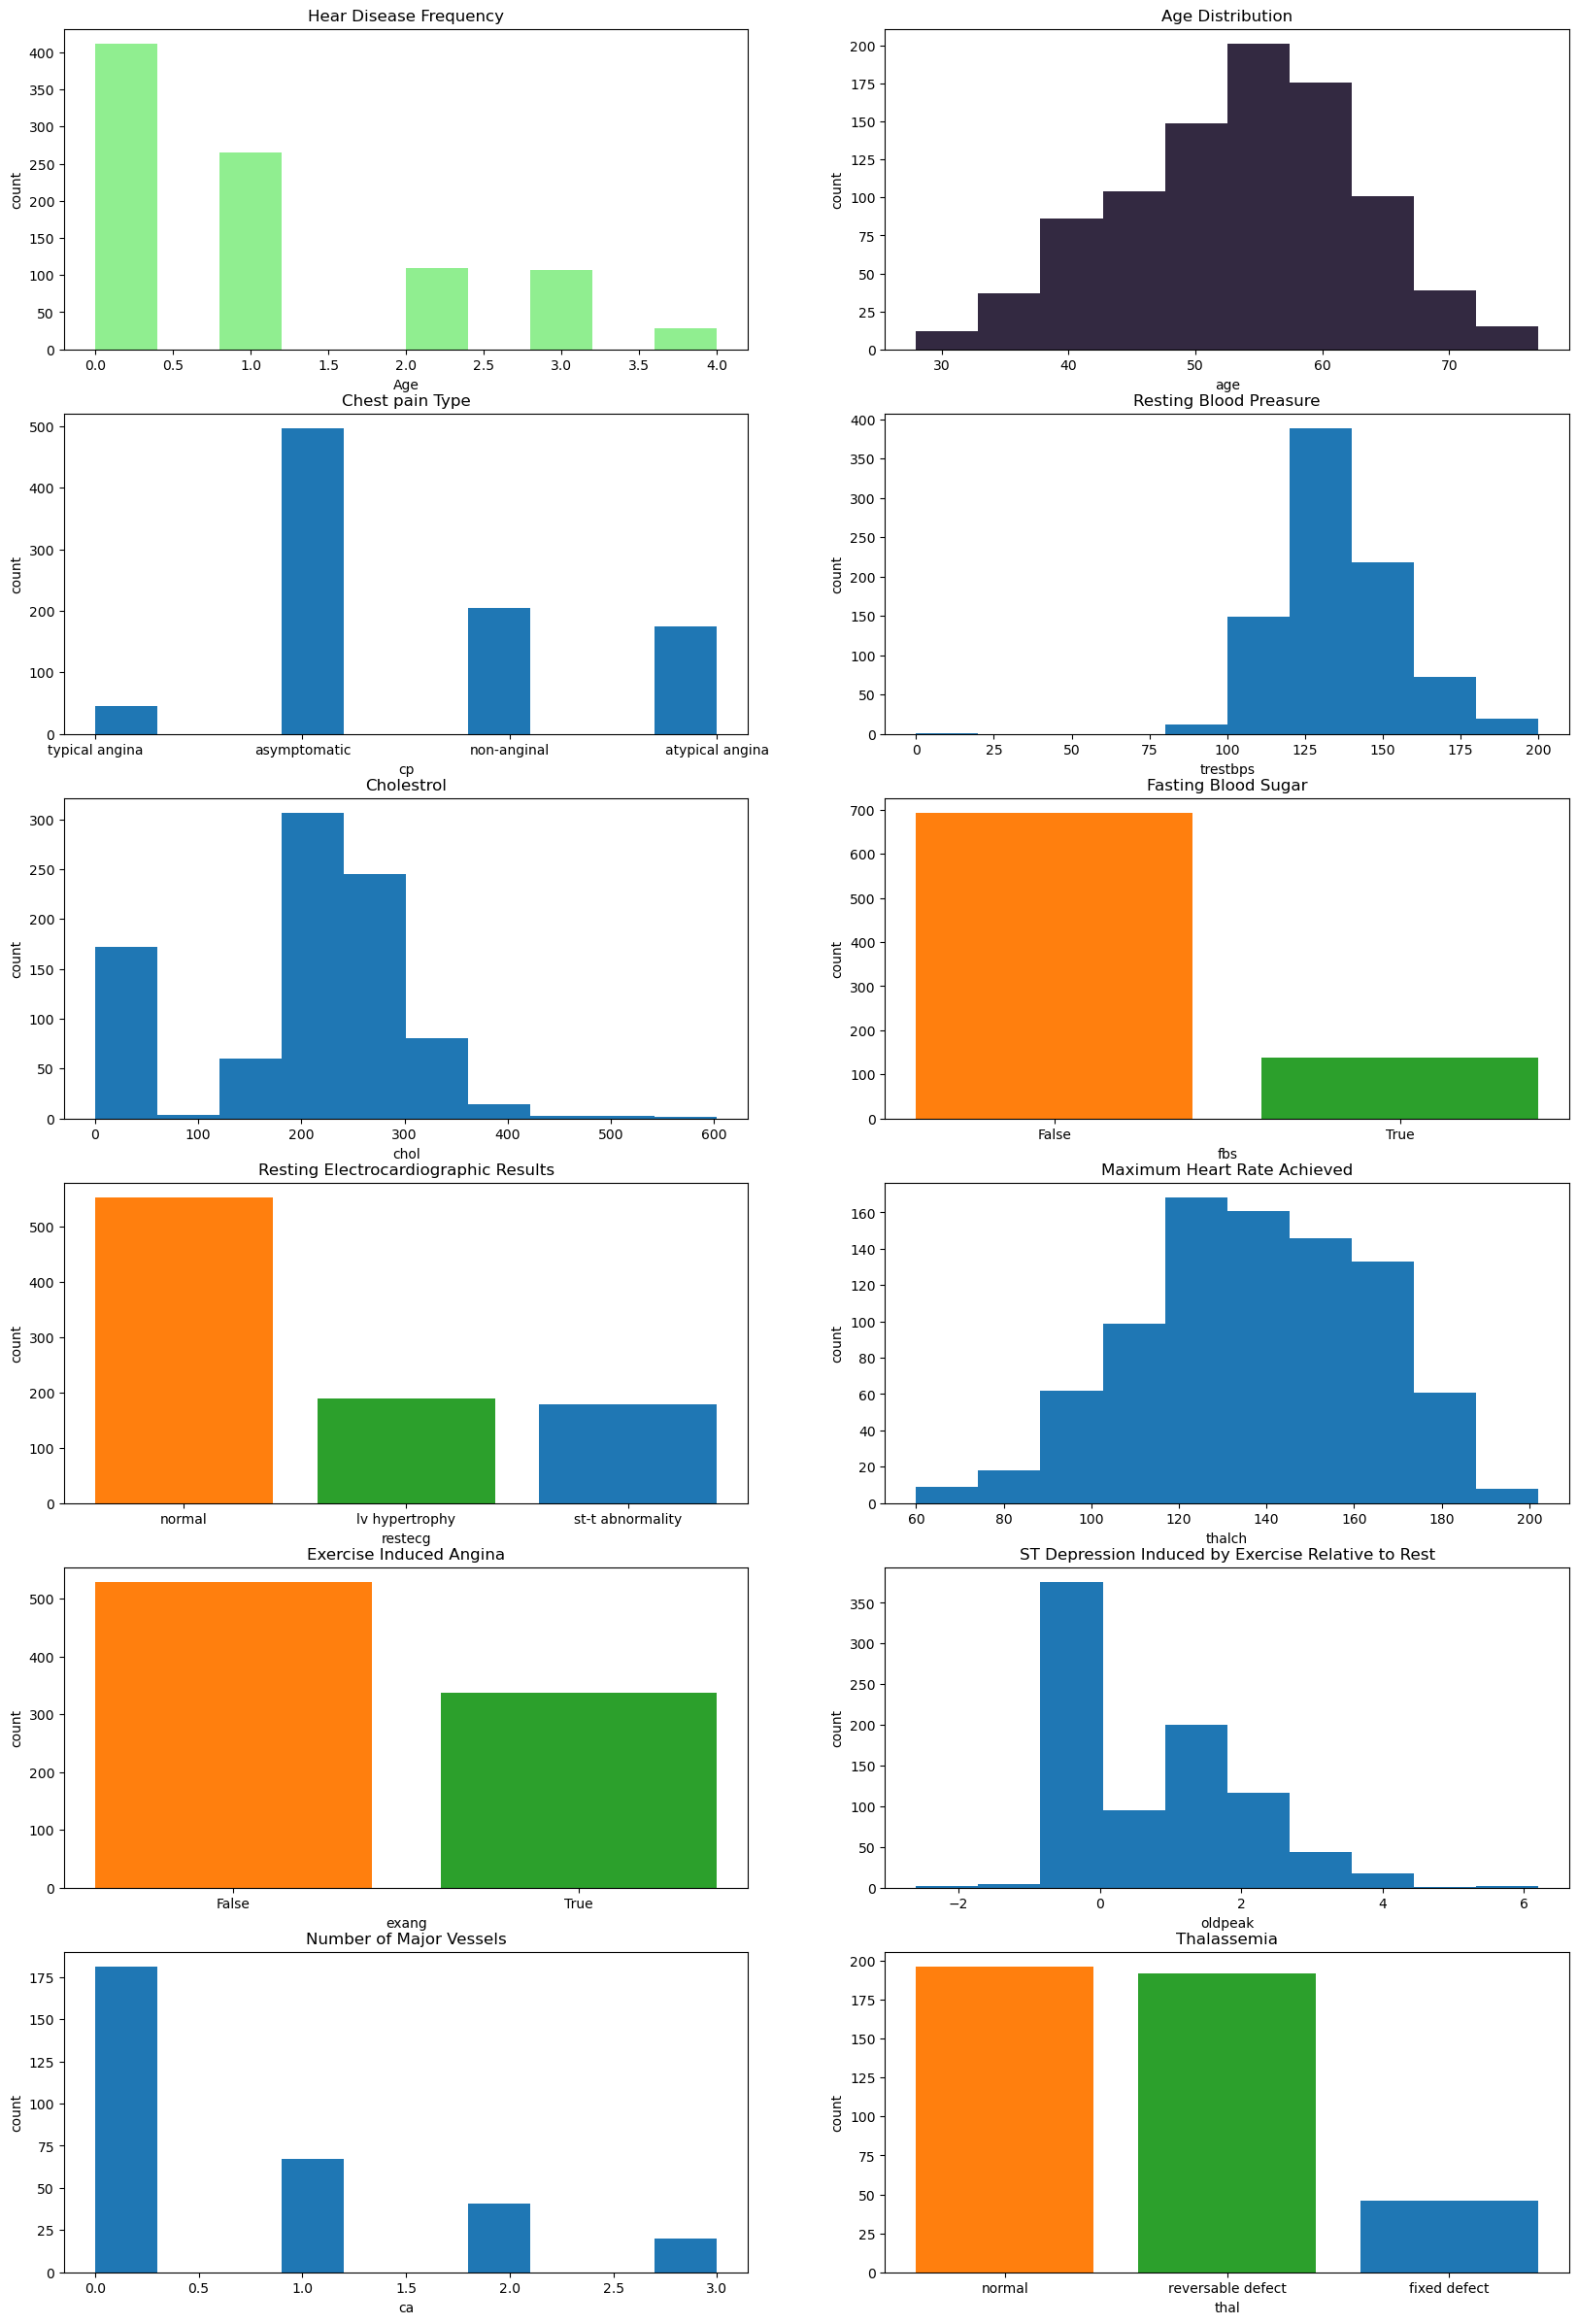

In [22]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8), (ax9, ax10), (ax11, ax12)) = plt.subplots(nrows=6,
                                            ncols=2,
                                            figsize=(20, 30))

# plot to each different axis

#num
ax1.hist(df["num"], color="lightGreen")
ax1.set_xlabel('Age')
ax1.set_ylabel('count')
ax1.set_title('Hear Disease Frequency')

# age
ax2.hist(df["age"], color="#332941")
ax2.set_xlabel('age')
ax2.set_ylabel('count')
ax2.set_title('Age Distribution')

# chest pain
ax3.hist(df["cp"])
ax3.set_xlabel('cp')
ax3.set_ylabel('count')
ax3.set_title('Chest pain Type')

# Trestbps (resting blood pressure)
ax4.hist(df["trestbps"])
ax4.set_xlabel('trestbps')
ax4.set_ylabel('count')
ax4.set_title('Resting Blood Preasure')

# Chol (serum cholesterol) 
ax5.hist(df["chol"])
ax5.set_xlabel('chol')
ax5.set_ylabel('count')
ax5.set_title('Cholestrol')

# Fbs (fasting blood sugar)
value_counts = df['fbs'].value_counts()
ax6.bar(value_counts.index.astype(str), value_counts, color=['tab:orange', 'tab:Green'])
ax6.set_xlabel('fbs')
ax6.set_ylabel('count')
ax6.set_title('Fasting Blood Sugar')

# Restecg (resting electrocardiographic results)
value_counts = df['restecg'].value_counts()
ax7.bar(value_counts.index.astype(str), value_counts, color=['tab:orange', 'tab:Green', 'tab:Blue'])
ax7.set_xlabel('restecg')
ax7.set_ylabel('count')
ax7.set_title('Resting Electrocardiographic Results')

# Thalach (maximum heart rate achieved)
ax8.hist(df["thalch"])
ax8.set_xlabel('thalch')
ax8.set_ylabel('count')
ax8.set_title('Maximum Heart Rate Achieved')

# Exang (exercise-induced angina)
value_counts = df['exang'].value_counts()
ax9.bar(value_counts.index.astype(str), value_counts, color=['tab:orange', 'tab:Green'])
ax9.set_xlabel('exang')
ax9.set_ylabel('count')
ax9.set_title('Exercise Induced Angina')

# Oldpeak (ST depression induced by exercise relative to rest) 
ax10.hist(df["oldpeak"])
ax10.set_xlabel('oldpeak')
ax10.set_ylabel('count')
ax10.set_title('ST Depression Induced by Exercise Relative to Rest')

# Ca (number of major vessels)
ax11.hist(df["ca"])
ax11.set_xlabel('ca')
ax11.set_ylabel('count')
ax11.set_title('Number of Major Vessels')

# Thal (Thalassemia)
value_counts = df['thal'].value_counts()
ax12.bar(value_counts.index.astype(str), value_counts, color=['tab:orange', 'tab:Green', 'tab:Blue'])
ax12.set_xlabel('thal')
ax12.set_ylabel('count')
ax12.set_title('Thalassemia');

## Data cleaning and preprocessing

In [23]:
df

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


In [24]:
df.dtypes

id            int64
age           int64
sex          object
dataset      object
cp           object
trestbps    float64
chol        float64
fbs          object
restecg      object
thalch      float64
exang        object
oldpeak     float64
slope        object
ca          float64
thal         object
num           int64
dtype: object

In [25]:
# Now let check null values in the dataset
df.isna().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [26]:
# filling missing values
df["trestbps"].fillna(df["trestbps"].mean(), inplace=True)
df["chol"].fillna(df["chol"].mean(), inplace=True)
df["thalch"].fillna(df["thalch"].mean(), inplace=True)
df["oldpeak"].fillna(df["oldpeak"].mean(), inplace=True)
df["ca"].fillna(df["ca"].mean(), inplace=True)

df["fbs"].fillna("missing", inplace=True)
df["restecg"].fillna("missing", inplace=True)
df["exang"].fillna("missing", inplace=True)
df["slope"].fillna("missing", inplace=True)
df["thal"].fillna("missing", inplace=True)

# num [0=no heart disease; 1,2,3,4 = stages of heart disease ]
# let replact the value 1,2,3,4 to disease beacuse our main objective of this project is to classify 
df["num"].replace([2.0, 3.0, 4.0], 1.0, inplace=True)

In [27]:
# Now let check null values in the dataset
df.isna().sum()

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [28]:
df

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.000000,233.0,True,lv hypertrophy,150.000000,False,2.300000,downsloping,0.000000,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.000000,286.0,False,lv hypertrophy,108.000000,True,1.500000,flat,3.000000,normal,1
2,3,67,Male,Cleveland,asymptomatic,120.000000,229.0,False,lv hypertrophy,129.000000,True,2.600000,flat,2.000000,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.000000,250.0,False,normal,187.000000,False,3.500000,downsloping,0.000000,normal,0
4,5,41,Female,Cleveland,atypical angina,130.000000,204.0,False,lv hypertrophy,172.000000,False,1.400000,upsloping,0.000000,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.000000,333.0,True,st-t abnormality,154.000000,False,0.000000,missing,0.676375,missing,1
916,917,62,Male,VA Long Beach,typical angina,132.132404,139.0,False,st-t abnormality,137.545665,missing,0.878788,missing,0.676375,missing,0
917,918,55,Male,VA Long Beach,asymptomatic,122.000000,223.0,True,st-t abnormality,100.000000,False,0.000000,missing,0.676375,fixed defect,1
918,919,58,Male,VA Long Beach,asymptomatic,132.132404,385.0,True,lv hypertrophy,137.545665,missing,0.878788,missing,0.676375,missing,0


In [29]:
from sklearn.preprocessing import LabelEncoder

# Create a copy of the DataFrame to avoid modifying the original data
df_num = df.copy()

# Use LabelEncoder to encode categorical and boolean columns
label_encoder = LabelEncoder()

# Iterate through columns and apply LabelEncoder
for column in df_num.columns:
    if df_num[column].dtype == 'object' or df_num[column].dtype == 'bool':
        # Convert boolean values to strings before applying LabelEncoder
        df_num[column] = label_encoder.fit_transform(df_num[column].astype(str))

# Convert the entire DataFrame to float
df_num = df_num.astype(float)

# Display the DataFrame with numeric values
df_num.head()


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1.0,63.0,1.0,0.0,3.0,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,0.0,0.0
1,2.0,67.0,1.0,0.0,0.0,160.0,286.0,0.0,0.0,108.0,1.0,1.5,1.0,3.0,2.0,1.0
2,3.0,67.0,1.0,0.0,0.0,120.0,229.0,0.0,0.0,129.0,1.0,2.6,1.0,2.0,3.0,1.0
3,4.0,37.0,1.0,0.0,2.0,130.0,250.0,0.0,2.0,187.0,0.0,3.5,0.0,0.0,2.0,0.0
4,5.0,41.0,0.0,0.0,1.0,130.0,204.0,0.0,0.0,172.0,0.0,1.4,3.0,0.0,2.0,0.0


In [30]:
df_num.to_csv("preprocessed_Heart_Disease.csv", index=False)

In [31]:
heart_disease = pd.read_csv("preprocessed_Heart_Disease.csv")
heart_disease

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1.0,63.0,1.0,0.0,3.0,145.000000,233.0,1.0,0.0,150.000000,0.0,2.300000,0.0,0.000000,0.0,0.0
1,2.0,67.0,1.0,0.0,0.0,160.000000,286.0,0.0,0.0,108.000000,1.0,1.500000,1.0,3.000000,2.0,1.0
2,3.0,67.0,1.0,0.0,0.0,120.000000,229.0,0.0,0.0,129.000000,1.0,2.600000,1.0,2.000000,3.0,1.0
3,4.0,37.0,1.0,0.0,2.0,130.000000,250.0,0.0,2.0,187.000000,0.0,3.500000,0.0,0.000000,2.0,0.0
4,5.0,41.0,0.0,0.0,1.0,130.000000,204.0,0.0,0.0,172.000000,0.0,1.400000,3.0,0.000000,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916.0,54.0,0.0,3.0,0.0,127.000000,333.0,1.0,3.0,154.000000,0.0,0.000000,2.0,0.676375,1.0,1.0
916,917.0,62.0,1.0,3.0,3.0,132.132404,139.0,0.0,3.0,137.545665,2.0,0.878788,2.0,0.676375,1.0,0.0
917,918.0,55.0,1.0,3.0,0.0,122.000000,223.0,1.0,3.0,100.000000,0.0,0.000000,2.0,0.676375,0.0,1.0
918,919.0,58.0,1.0,3.0,0.0,132.132404,385.0,1.0,0.0,137.545665,2.0,0.878788,2.0,0.676375,1.0,0.0


## Finding Paterns in our dataset

In [32]:
heart_disease.dtypes

id          float64
age         float64
sex         float64
dataset     float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalch      float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
num         float64
dtype: object

### Heart Disease Frequency acoording to sex

In [33]:
df.sex.value_counts()

sex
Male      726
Female    194
Name: count, dtype: int64

In [34]:
# compare num col. with sex col
pd.crosstab(heart_disease.num, heart_disease.sex)

sex,0.0,1.0
num,,
0.0,144,267
1.0,50,459


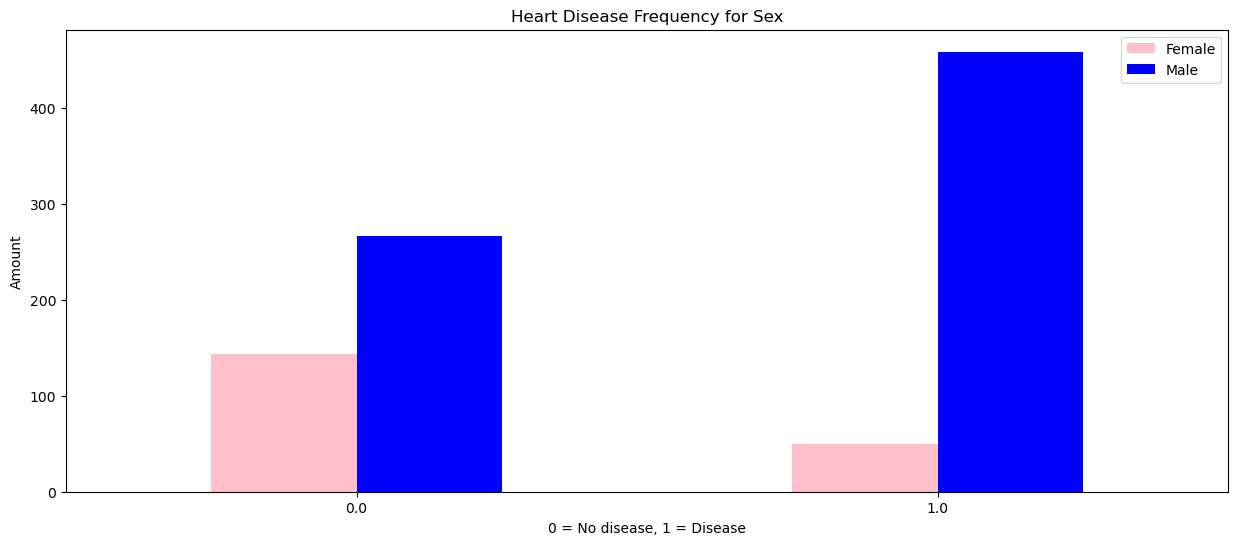

In [35]:
# create a plot of crosstab
pd.crosstab(heart_disease.num, heart_disease.sex).plot(kind="bar",
                                                      figsize=(15, 6),
                                                      color=["pink", "blue"])
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0);

### Age vs Max Heart Rate for Disease

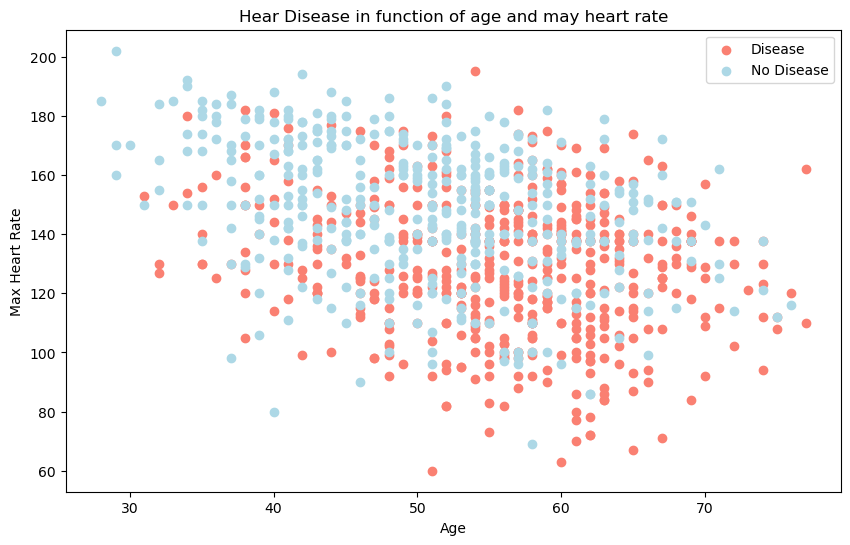

In [36]:
# Create figure
plt.figure(figsize=(10, 6))

# scatter with postive examples
plt.scatter(heart_disease.age[heart_disease.num==1],
           heart_disease.thalch[heart_disease.num==1],
           c="salmon")

# scatter with negative examples
plt.scatter(heart_disease.age[heart_disease.num == 0],
           heart_disease.thalch[heart_disease.num==0],
           c="lightblue")
plt.title("Hear Disease in function of age and may heart rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

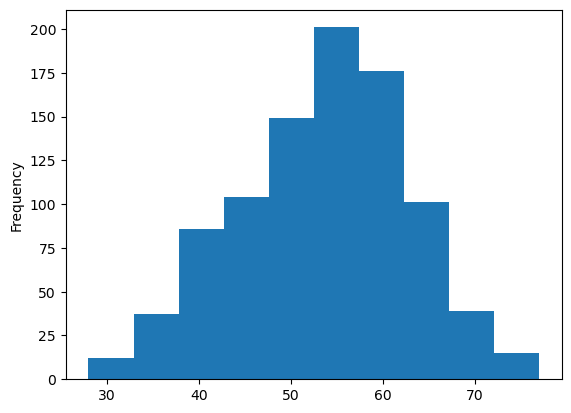

In [37]:
# check the distribution of the age column with a histogram
df.age.plot.hist();

### Heart Disease Frequency per chest pain type
* **0: Typical Angina:** The most common type of chest pain associated with heart disease, typically triggered by physical activity or stress and relieved by rest or medication like nitroglycerin. It's often described as a feeling of pressure or squeezing in the chest.

* **1: Atypical Angina:** This type of chest pain is similar to typical angina but differs in its characteristics, such as duration, intensity, or triggers. It may not always follow the classic pattern of typical angina.

* **2: Non-Anginal Pain:** This refers to chest pain that is not related to heart disease. It might be caused by other factors such as muscular issues, gastrointestinal problems, or other non-cardiac conditions.
  
* **3: Asymptomatic:** This indicates the absence of chest pain or discomfort, even in the presence of heart disease. Some individuals with heart disease do not experience the typical chest pain symptoms.

In [38]:
pd.crosstab(heart_disease.cp, heart_disease.num)

num,0.0,1.0
cp,,
0.0,104,392
1.0,150,24
2.0,131,73
3.0,26,20


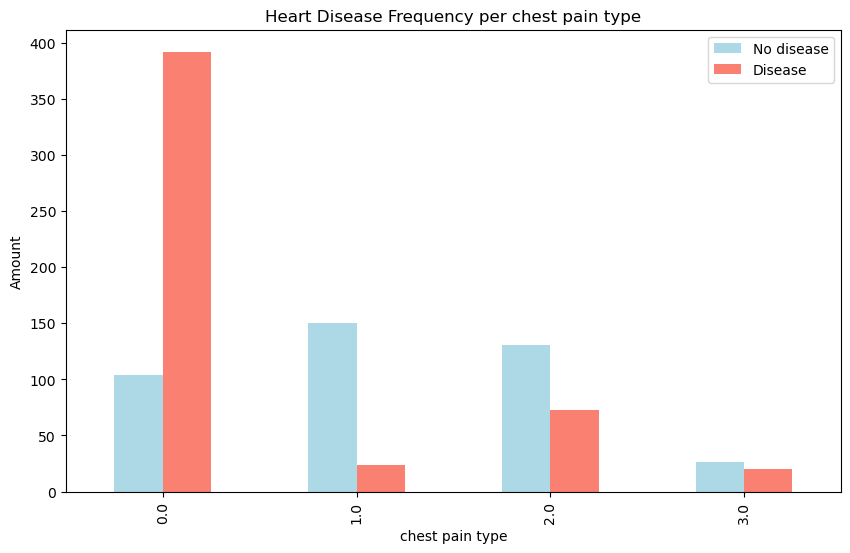

In [39]:
# Make the crosstab more visual
pd.crosstab(heart_disease.cp, heart_disease.num).plot(kind="bar",
                                                     figsize=(10,6),
                                                     color=["lightblue","salmon"])
plt.title("Heart Disease Frequency per chest pain type")
plt.xlabel("chest pain type")
plt.ylabel("Amount")
plt.legend(["No disease", "Disease"]);

In [40]:
# irrelevant columns
heart_disease = heart_disease.drop(["id", "dataset"], axis=1) 

In [41]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,3.0,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,0.0,0.0
1,67.0,1.0,0.0,160.0,286.0,0.0,0.0,108.0,1.0,1.5,1.0,3.0,2.0,1.0
2,67.0,1.0,0.0,120.0,229.0,0.0,0.0,129.0,1.0,2.6,1.0,2.0,3.0,1.0
3,37.0,1.0,2.0,130.0,250.0,0.0,2.0,187.0,0.0,3.5,0.0,0.0,2.0,0.0
4,41.0,0.0,1.0,130.0,204.0,0.0,0.0,172.0,0.0,1.4,3.0,0.0,2.0,0.0


In [42]:
# Make a correlation matrix 
heart_disease.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
age,1.000000,0.056889,-0.076519,0.235253,-0.084499,0.125887,-0.061870,-0.353471,0.250938,0.248082,-0.150467,0.204139,0.109161,0.282700
sex,0.056889,1.000000,-0.125933,0.001073,-0.193782,0.106900,0.065121,-0.177135,0.207197,0.102733,-0.091783,0.062058,-0.034810,0.307284
cp,-0.076519,-0.125933,1.000000,-0.022565,0.064510,-0.078563,-0.067363,0.289362,-0.241050,-0.173515,0.181957,-0.124987,-0.018138,-0.385077
trestbps,0.235253,0.001073,-0.022565,1.000000,0.088290,-0.011342,-0.012914,-0.104616,0.118150,0.160268,-0.062489,0.051940,0.055386,0.102922
chol,-0.084499,-0.193782,0.064510,0.088290,1.000000,-0.409776,-0.201553,0.226325,-0.029114,0.045498,0.054787,0.017544,-0.012395,-0.226467
fbs,0.125887,0.106900,-0.078563,-0.011342,-0.409776,1.000000,0.101729,-0.133091,0.004113,0.005826,-0.032807,0.072572,-0.093200,0.235853
restecg,-0.061870,0.065121,-0.067363,-0.012914,-0.201553,0.101729,1.000000,-0.156514,0.112175,-0.056689,-0.017428,-0.075888,-0.327493,0.031341
thalch,-0.353471,-0.177135,0.289362,-0.104616,0.226325,-0.133091,-0.156514,1.000000,-0.277324,-0.149630,0.320365,-0.140644,0.060149,-0.382942
exang,0.250938,0.207197,-0.241050,0.118150,-0.029114,0.004113,0.112175,-0.277324,1.000000,0.306694,-0.217619,0.057262,-0.025535,0.376623
oldpeak,0.248082,0.102733,-0.173515,0.160268,0.045498,0.005826,-0.056689,-0.149630,0.306694,1.000000,-0.444801,0.178886,0.074630,0.372890


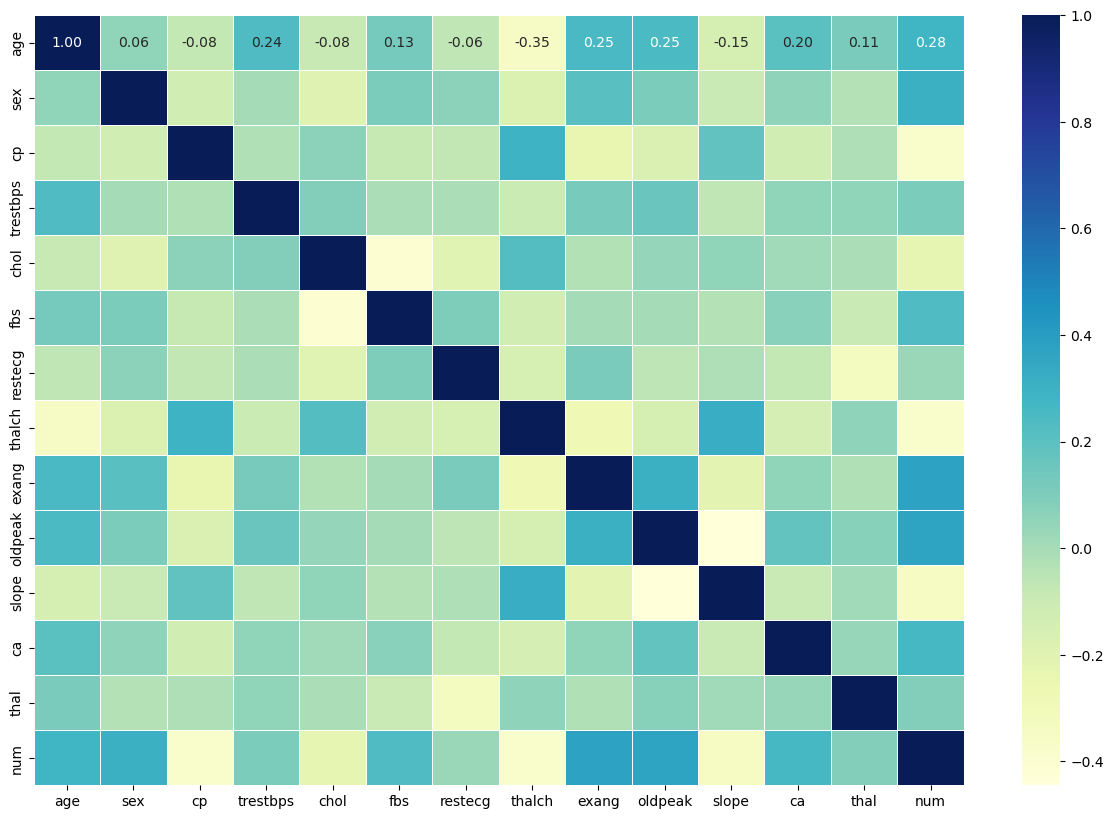

In [43]:
corr_matrix = heart_disease.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap="YlGnBu")

## Modeling

In [44]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,3.0,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,0.0,0.0
1,67.0,1.0,0.0,160.0,286.0,0.0,0.0,108.0,1.0,1.5,1.0,3.0,2.0,1.0
2,67.0,1.0,0.0,120.0,229.0,0.0,0.0,129.0,1.0,2.6,1.0,2.0,3.0,1.0
3,37.0,1.0,2.0,130.0,250.0,0.0,2.0,187.0,0.0,3.5,0.0,0.0,2.0,0.0
4,41.0,0.0,1.0,130.0,204.0,0.0,0.0,172.0,0.0,1.4,3.0,0.0,2.0,0.0


In [45]:
# split data into x and y
x = heart_disease.drop("num", axis=1)
y = heart_disease["num"]

In [46]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal
0,63.0,1.0,3.0,145.000000,233.0,1.0,0.0,150.000000,0.0,2.300000,0.0,0.000000,0.0
1,67.0,1.0,0.0,160.000000,286.0,0.0,0.0,108.000000,1.0,1.500000,1.0,3.000000,2.0
2,67.0,1.0,0.0,120.000000,229.0,0.0,0.0,129.000000,1.0,2.600000,1.0,2.000000,3.0
3,37.0,1.0,2.0,130.000000,250.0,0.0,2.0,187.000000,0.0,3.500000,0.0,0.000000,2.0
4,41.0,0.0,1.0,130.000000,204.0,0.0,0.0,172.000000,0.0,1.400000,3.0,0.000000,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,54.0,0.0,0.0,127.000000,333.0,1.0,3.0,154.000000,0.0,0.000000,2.0,0.676375,1.0
916,62.0,1.0,3.0,132.132404,139.0,0.0,3.0,137.545665,2.0,0.878788,2.0,0.676375,1.0
917,55.0,1.0,0.0,122.000000,223.0,1.0,3.0,100.000000,0.0,0.000000,2.0,0.676375,0.0
918,58.0,1.0,0.0,132.132404,385.0,1.0,0.0,137.545665,2.0,0.878788,2.0,0.676375,1.0


In [47]:
y

0      0.0
1      1.0
2      1.0
3      0.0
4      0.0
      ... 
915    1.0
916    0.0
917    1.0
918    0.0
919    1.0
Name: num, Length: 920, dtype: float64

In [48]:
# split data into train and test sets
np.random.seed(42)

# split into train and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

we're going to try 3 different machine learning models
1. Logstic Regression
2. k-Nearest Neighbours classifier
3. Random Forest Classifier

In [49]:
# put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
         "KNN": KNeighborsClassifier(),
         "Random Forest": RandomForestClassifier()}

# create a function to fit and score modeles
def fit_and_score(models, x_train, x_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : adict of differenct scikit-Learn machine learning models
    x_train : training data (no labels)
    x_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    # set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # loop through models
    for name, model in models.items():
        # fit the model to the data
        model.fit(x_train, y_train)
        # evaluate the model and append its score to mosel_scores
        model_scores[name] = model.score(x_test, y_test)
    return model_scores

In [50]:
model_scores = fit_and_score(models=models,
                            x_train=x_train,
                            x_test=x_test,
                            y_train=y_train,
                            y_test=y_test)
model_scores

{'Logistic Regression': 0.8043478260869565,
 'KNN': 0.6684782608695652,
 'Random Forest': 0.8315217391304348}

### Model Comparison

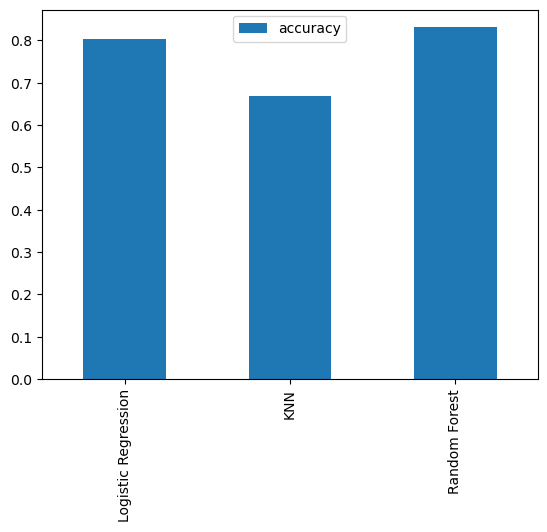

In [51]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

### Hyperparameter tuning (by hand)

In [52]:
# Instantiate the KNeighborsClassifier
knn = KNeighborsClassifier()

train_scores = []
test_scores = []

# Create a list of different neighbors
neighbors = range(1, 21)

# Loop through different n_neighbors
for i in neighbors:
    # Set the number of neighbors for the current iteration
    knn.set_params(n_neighbors=i)

    # Fit the algorithm
    knn.fit(x_train, y_train)

    # Update the training scores list
    train_scores.append(knn.score(x_train, y_train))

    # Update the test score list
    test_scores.append(knn.score(x_test, y_test))


In [53]:
train_scores

[1.0,
 0.8288043478260869,
 0.8179347826086957,
 0.7703804347826086,
 0.7921195652173914,
 0.7730978260869565,
 0.7785326086956522,
 0.7527173913043478,
 0.7527173913043478,
 0.7445652173913043,
 0.7567934782608695,
 0.7527173913043478,
 0.7567934782608695,
 0.7472826086956522,
 0.7472826086956522,
 0.7445652173913043,
 0.7432065217391305,
 0.7269021739130435,
 0.7214673913043478,
 0.717391304347826]

In [54]:
test_scores

[0.6467391304347826,
 0.6358695652173914,
 0.6467391304347826,
 0.6358695652173914,
 0.6684782608695652,
 0.6684782608695652,
 0.7010869565217391,
 0.7065217391304348,
 0.717391304347826,
 0.7010869565217391,
 0.717391304347826,
 0.7065217391304348,
 0.7391304347826086,
 0.717391304347826,
 0.7554347826086957,
 0.7010869565217391,
 0.7282608695652174,
 0.7282608695652174,
 0.7228260869565217,
 0.717391304347826]

Maximum KNN score on the test data : 75.54%


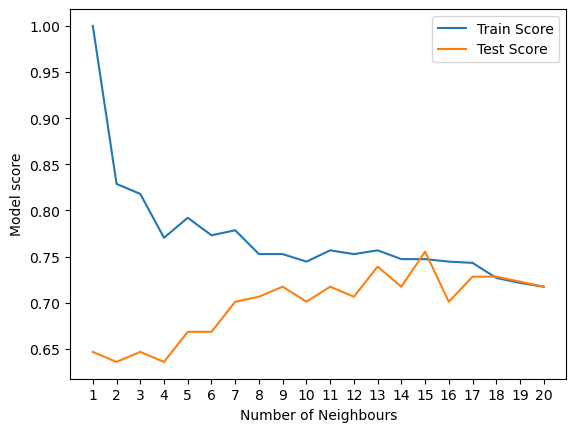

In [55]:
plt.plot(neighbors, train_scores, label="Train Score")
plt.plot(neighbors, test_scores, label="Test Score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of Neighbours")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data : {max(test_scores) * 100:.2f}%");

### Hyperparameter tuning with RandomizedSearchCV

In [56]:
# create a hyperparameter grid for KNN
KNeighborsClassifier()
LogisticRegression()
RandomForestClassifier()

knn_grid = {"n_neighbors": np.arange(1, 21)}

# create a hyperparameter grid for logstic regression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
               "solver": ["liblinear"]}

# create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
          "max_depth": [None, 3, 5, 10],
          "min_samples_split": np.arange(2, 20, 2),
          "min_samples_leaf": np.arange(1, 20, 2),
          "max_features": np.arange(1, 20, 2)}

Tune logstic regression

In [57]:
np.random.seed(42)

# setup random hyperparameter search for LogsticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv=5,
                               n_iter=10,
                               verbose=True)

# fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(x_train, y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [58]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 4.281332398719396}

In [59]:
rs_log_reg.score(x_test, y_test)

0.8152173913043478

Tune RandomForest by RandomizedSearchCV

In [60]:
np.random.seed(42)

# setup random hyperparameter search for RandomForest
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                               param_distributions=rf_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)

# fit random hyperparameter search model for RandomForest
rs_rf.fit(x_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [61]:
rs_rf.best_params_

{'n_estimators': 460,
 'min_samples_split': 6,
 'min_samples_leaf': 9,
 'max_features': 1,
 'max_depth': None}

In [62]:
rs_rf.score(x_test, y_test)

0.8586956521739131

Tune RandomForest using GridSearchCV

In [63]:
# # create a hyperparameter grid for RandomForestClassifier
# rf_grid = {"n_estimators": np.arange(10, 1000, 50),
#           "max_depth": [None, 3, 5, 10],
#           "min_samples_split": np.arange(2, 20, 2),
#           "min_samples_leaf": np.arange(1, 20, 2),
#           "max_features": np.arange(1, 20, 2)}

# # setup grid hyperparameter search for RandomForest
# gs_rf = GridSearchCV(RandomForestClassifier(),
#                     param_grid=rf_grid,
#                     cv=2,
#                     verbose=True)

# # fit grid hyperparameter search model
# gs_rf.fit(x_train, y_train);

## Evaluating our tuned ml classifier
* ROC curve and AUC score
* confusion matrix
* classfication Report
* Precision
* Recall
* F1-score

In [64]:
# make predictions with tuned model
y_preds = rs_rf.predict(x_test)

In [65]:
y_preds

array([0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0.,
       0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 0., 1.,
       0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1.,
       0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1.,
       1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1.,
       1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1.,
       0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1.,
       1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1.])

In [66]:
y_test

319    0.0
377    0.0
538    1.0
296    1.0
531    1.0
      ... 
382    0.0
97     1.0
906    1.0
467    0.0
732    1.0
Name: num, Length: 184, dtype: float64

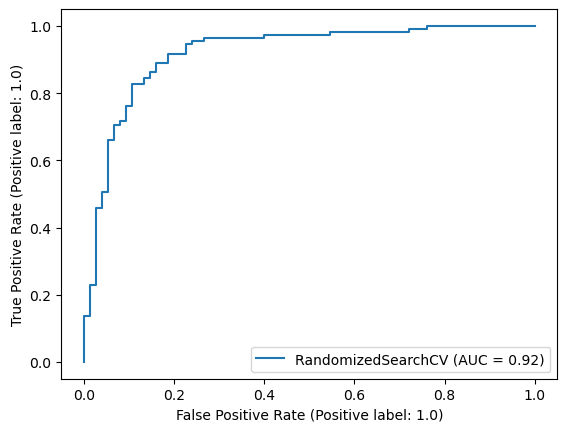

In [67]:
# ROC
RocCurveDisplay.from_estimator(rs_rf, x_test, y_test);

In [68]:
# confusion metrix
print(confusion_matrix(y_test, y_preds))

[[64 11]
 [15 94]]


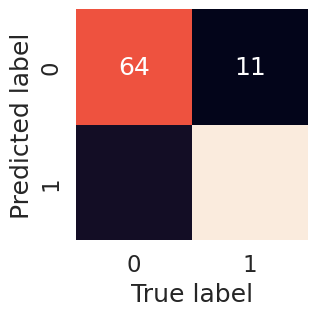

In [69]:
sns.set(font_scale=1.5)
def plot_conf_mat(y_test, y_preds):
    """
    plots confusion matrix using seaborn heatmap
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                    annot = True,
                    cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    # bottom, top = ax.get_ylim()
    # ax.set_ylim(bottom + 0.5, top - 0.5)

plot_conf_mat(y_test, y_preds)

In [70]:
# classfication Report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

         0.0       0.81      0.85      0.83        75
         1.0       0.90      0.86      0.88       109

    accuracy                           0.86       184
   macro avg       0.85      0.86      0.85       184
weighted avg       0.86      0.86      0.86       184



In [71]:
# calculate evaluation metrics using cross-validation
rs_rf.best_params_

{'n_estimators': 460,
 'min_samples_split': 6,
 'min_samples_leaf': 9,
 'max_features': 1,
 'max_depth': None}

In [72]:
clf = RandomForestClassifier(n_estimators=460,
                             min_samples_split=6,
                             min_samples_leaf=9,
                             max_features=1,
                             max_depth=None)

In [73]:
# cross-validated accuracy
cv_acc = cross_val_score(clf,
                        x,
                        y,
                        cv=10,
                        scoring="accuracy")
cv_acc = np.mean(cv_acc)
print(cv_acc)

0.817391304347826


In [74]:
# cross-validated precision
cv_precision = cross_val_score(clf,
                        x,
                        y,
                        cv=10,
                        scoring="precision")
cv_precision = np.mean(cv_precision)
print(cv_precision)

0.837017190010924


In [75]:
# cross-validated recall
cv_recall = cross_val_score(clf,
                        x,
                        y,
                        cv=10,
                        scoring="recall")
cv_recall = np.mean(cv_recall)
print(cv_recall)

0.8780392156862746


In [76]:
# cross-validated f1-score
cv_f1 = cross_val_score(clf,
                        x,
                        y,
                        cv=10,
                        scoring="f1")
cv_f1 = np.mean(cv_f1)
print(cv_f1)

0.8479090166678297


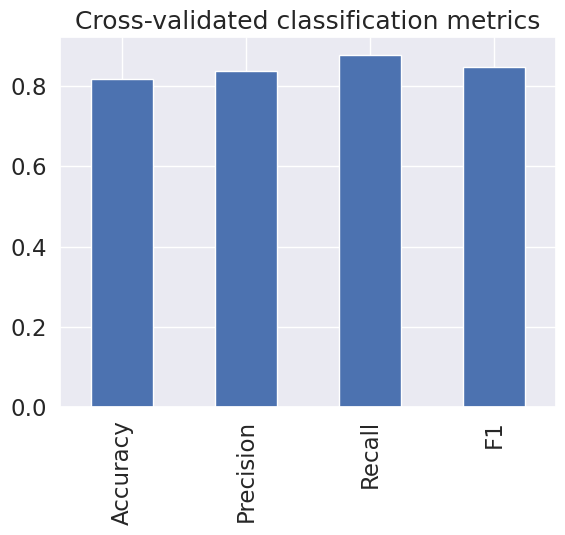

In [77]:
# visualize cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_precision,
                           "Recall": cv_recall,
                           "F1": cv_f1},
                          index=[0])

cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                     legend=False);

### Feature Importance

In [78]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,3.0,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,0.0,0.0
1,67.0,1.0,0.0,160.0,286.0,0.0,0.0,108.0,1.0,1.5,1.0,3.0,2.0,1.0
2,67.0,1.0,0.0,120.0,229.0,0.0,0.0,129.0,1.0,2.6,1.0,2.0,3.0,1.0
3,37.0,1.0,2.0,130.0,250.0,0.0,2.0,187.0,0.0,3.5,0.0,0.0,2.0,0.0
4,41.0,0.0,1.0,130.0,204.0,0.0,0.0,172.0,0.0,1.4,3.0,0.0,2.0,0.0


In [79]:
clf = RandomForestClassifier(n_estimators=460,
                             min_samples_split=6,
                             min_samples_leaf=9,
                             max_features=1,
                             max_depth=None)
clf.fit(x_train, y_train);

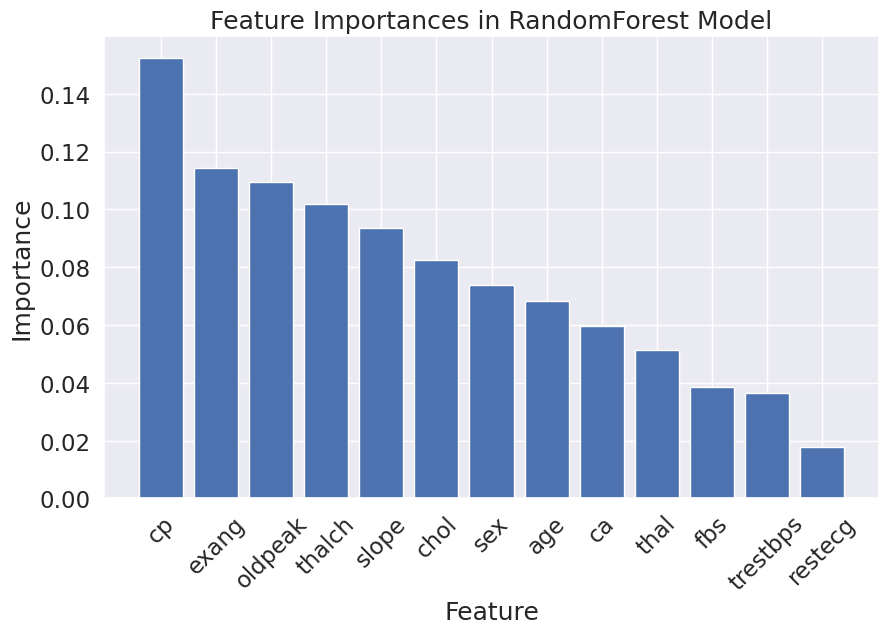

In [80]:
# Get feature importances
importances = clf.feature_importances_

# Get feature names (replace this with your actual feature names)
feature_names = x_train.columns

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), feature_names[indices], rotation=45)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importances in RandomForest Model")
plt.show()

In [81]:
# #7. Save a model and load it
# import pickle
# pickle.dump(clf, open("Heart_Disease_Random_Forest.pkl","wb"))

In [82]:
# loaded_model = pickle.load(open("Heart_Disease_Random_Forest.pkl", "rb"))
# loaded_model.score(x_test, y_test)